In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy
import pickle

In [15]:
# Pretty plots
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Calisto MT'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['axes.unicode_minus'] = False  
matplotlib.rcParams.update({'font.size': 15}) 
def setup_plot():
    fig = plt.figure(dpi=100, figsize=(7.0,4.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.tick_params(direction='in')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.ticklabel_format(style='sci', scilimits=(-1,3), axis='y')

## __Load MSE and J Data__

In [18]:
env = 'll'
version = "C2L"

bc_mse_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_mse_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_mse_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
bc_J_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/bc_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_J_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_J_denoised_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)

bc_mse_noisy_C2L= np.stack(np.load("./data/output_mse&J/{0}/bc_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_mse_noisy_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_mse_noisy_C2L = np.stack(np.load("./data/output_mse&J/{0}/ccil_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
bc_J_noisy_C2L = np.stack(np.load("./data/output_mse&J/{0}/bc_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_J_noisy_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_J_noisy_C2L = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)


In [19]:
version = "DRL"

bc_mse_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_mse_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_mse_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
bc_J_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/bc_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_J_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_J_denoised_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)

bc_mse_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_mse_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_mse_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/ccil_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
bc_J_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/bc_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil2_J_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
ccil_J_noisy_DRL = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)



In [20]:
version = 'Raw'

if env == 'll':
    bc_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil2_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/residuil_mse_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    bc_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_J_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil2_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/residuil_J_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/doubil_mse_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/doubil_J_denoised_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)

    bc_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil2_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/residuil_mse_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    bc_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_J_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil2_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/residuil_J_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/doubil_mse_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
    ccil_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/doubil_J_noisy_{0}.npz".format(env), allow_pickle=True)["arr_0"][:], axis=0)
else:
    bc_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil2_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil_mse_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    bc_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil2_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil_J_denoised_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)

    bc_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil2_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL2_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil_mse_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    bc_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/bc_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil2_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
    ccil_J_noisy_raw = np.stack(np.load("./data/output_mse&J/{0}/CCIL_J_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)

## __Load GAIL Data__

In [12]:
version = '3_TCN_ppo_epoch4_lr3e-4_gamma1'
gail_mse_denoised = np.stack(np.load("./data/{0}_output_data/gail_mse_denoised_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
gail_mse_noisy = np.stack(np.load("./data/{0}_output_data/gail_mse_noisy_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
gail_J_denoised = np.stack(np.load("./data/{0}_output_data/gail_J_denoised_test_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)
gail_J_noisy = np.stack(np.load("./data/{0}_output_data/gail_J_noisy_test_{0}_{1}.pkl".format(env,version), allow_pickle=True)[:], axis=0)


In [13]:
gail_J_noisy

array([[-330.04981957, -191.3591277 , -119.95932754,  -76.04322195,
         -54.12660551]])

In [ ]:
# gail_J_noisy=np.array([[-330.049819567411 ,  -191.35912770 , -119.95932754, -76.04322195, -54.12660551]])
# with open("./data/{0}_output_data/gail_J_noisy_test_{0}_{1}.pkl".format(env,version),"wb") as f:
#     pickle.dump(gail_J_noisy,f)

## __MSE and J__ Visualization
#### *MSE* Plot of **BC, DoubIL, RedisuIL** with TCN Data and 3-TCN Data under *Confounded and Unconfounded*

MSE under Confounded

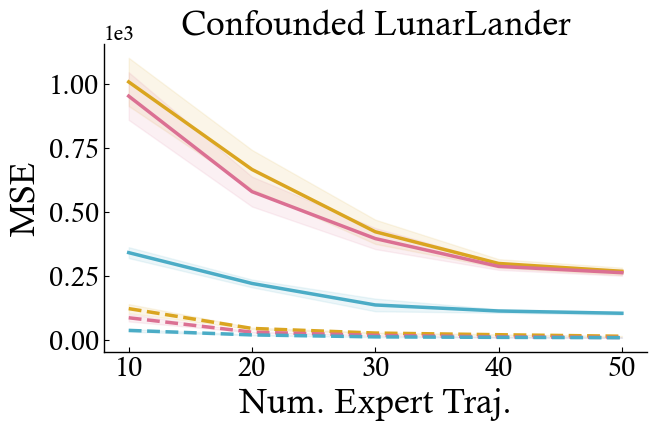

In [36]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("MSE", fontsize=25)
if env == "ant":
    plt.title("Confounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Confounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Confounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

plt.plot(np.arange(10, 51, 10), bc_mse_noisy_raw.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_noisy_raw.mean(axis=0) - (bc_mse_noisy_raw.std(axis=0) / np.sqrt(len(bc_mse_noisy_raw))),
                 bc_mse_noisy_raw.mean(axis=0) + (bc_mse_noisy_raw.std(axis=0) / np.sqrt(len(bc_mse_noisy_raw))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_mse_noisy_raw.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_noisy_raw.mean(axis=0) - (ccil_mse_noisy_raw.std(axis=0) / np.sqrt(len(ccil_mse_noisy_raw))),
                 ccil_mse_noisy_raw.mean(axis=0) + (ccil_mse_noisy_raw.std(axis=0) / np.sqrt(len(ccil_mse_noisy_raw))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_mse_noisy_raw.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_noisy_raw.mean(axis=0) - (ccil2_mse_noisy_raw.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_raw))),
                 ccil2_mse_noisy_raw.mean(axis=0) + (ccil2_mse_noisy_raw.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_raw))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), bc_mse_noisy_DRL.mean(axis=0), label="BC New", color="#DAA520", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_noisy_DRL.mean(axis=0) - (bc_mse_noisy_DRL.std(axis=0) / np.sqrt(len(bc_mse_noisy_DRL))),
                 bc_mse_noisy_DRL.mean(axis=0) + (bc_mse_noisy_DRL.std(axis=0) / np.sqrt(len(bc_mse_noisy_DRL))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_mse_noisy_DRL.mean(axis=0), label="Doubil New", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_noisy_DRL.mean(axis=0) - (ccil_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_mse_noisy_DRL))),
                 ccil_mse_noisy_DRL.mean(axis=0) + (ccil_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_mse_noisy_DRL))),
                 color = "#DB7093",
                 alpha = 0.1)

plt.plot(np.arange(10, 51, 10), ccil2_mse_noisy_DRL.mean(axis=0), label="Residuil New", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_noisy_DRL.mean(axis=0) - (ccil2_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_DRL))),
                 ccil2_mse_noisy_DRL.mean(axis=0) + (ccil2_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_DRL))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="upper right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/cnfnd_mse_{0}_Raw&TCN.pdf".format(env), bbox_inches='tight')

MSE under Unconfounded

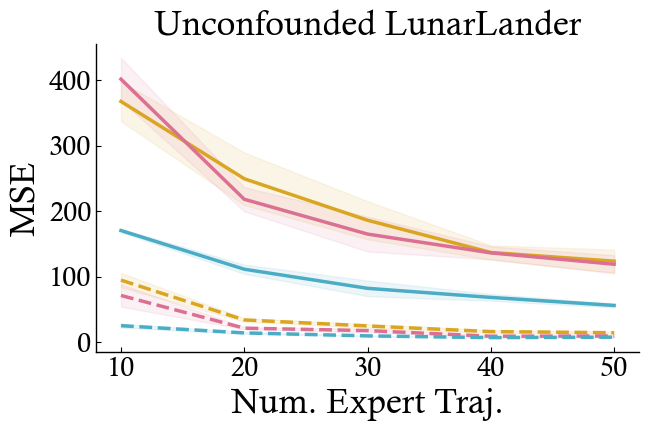

In [20]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("MSE", fontsize=25)
if env == "ant":
    plt.title("Unconfounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Unconfounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Unconfounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

plt.plot(np.arange(10, 51, 10), bc_mse_denoised_raw.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_denoised_raw.mean(axis=0) - (bc_mse_denoised_raw.std(axis=0) / np.sqrt(len(bc_mse_denoised_raw))),
                 bc_mse_denoised_raw.mean(axis=0) + (bc_mse_denoised_raw.std(axis=0) / np.sqrt(len(bc_mse_denoised_raw))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_mse_denoised_raw.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_denoised_raw.mean(axis=0) - (ccil_mse_denoised_raw.std(axis=0) / np.sqrt(len(ccil_mse_denoised_raw))),
                 ccil_mse_denoised_raw.mean(axis=0) + (ccil_mse_denoised_raw.std(axis=0) / np.sqrt(len(ccil_mse_denoised_raw))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_mse_denoised_raw.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_denoised_raw.mean(axis=0) - (ccil2_mse_denoised_raw.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_raw))),
                 ccil2_mse_denoised_raw.mean(axis=0) + (ccil2_mse_denoised_raw.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_raw))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), bc_mse_denoised_DRL.mean(axis=0), label="BC New", color="#DAA520", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_denoised_DRL.mean(axis=0) - (bc_mse_denoised_DRL.std(axis=0) / np.sqrt(len(bc_mse_denoised_DRL))),
                 bc_mse_denoised_DRL.mean(axis=0) + (bc_mse_denoised_DRL.std(axis=0) / np.sqrt(len(bc_mse_denoised_DRL))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_mse_denoised_DRL.mean(axis=0), label="Doubil New", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_denoised_DRL.mean(axis=0) - (ccil_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_mse_denoised_DRL))),
                 ccil_mse_denoised_DRL.mean(axis=0) + (ccil_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_mse_denoised_DRL))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_mse_denoised_DRL.mean(axis=0), label="Residuil New", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_denoised_DRL.mean(axis=0) - (ccil2_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_DRL))),
                 ccil2_mse_denoised_DRL.mean(axis=0) + (ccil2_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_DRL))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="upper right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/noiseless_mse_{0}_Raw&TCN.pdf".format(env), bbox_inches='tight')

#### *MSE* Plot of between **BC, DoubIL, RedisuIL** and __C2L, C2L__ under *Confounded and Unconfounded*
MSE under Confounded

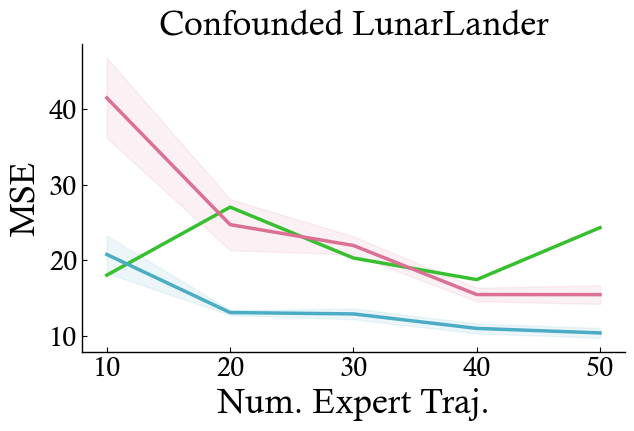

In [28]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("MSE", fontsize=25)
if env == "ant":
    plt.title("Confounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Confounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Confounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)
# plt.plot(np.arange(10, 51, 10), bc_mse_noisy_DRL.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  bc_mse_noisy_DRL.mean(axis=0) - (bc_mse_noisy_DRL.std(axis=0) / np.sqrt(len(bc_mse_noisy_DRL))),
#                  bc_mse_noisy_DRL.mean(axis=0) + (bc_mse_noisy_DRL.std(axis=0) / np.sqrt(len(bc_mse_noisy_DRL))),
#                  color = "#DAA520",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), gail_mse_noisy.mean(axis=0), label="GAIL", color="#36C02F", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 gail_mse_noisy.mean(axis=0) - (gail_mse_noisy.std(axis=0) / np.sqrt(len(gail_mse_noisy))),
                 gail_mse_noisy.mean(axis=0) + (gail_mse_noisy.std(axis=0) / np.sqrt(len(gail_mse_noisy))),
                 color = "#36C02F",
                 alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil_mse_noisy_DRL.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil_mse_noisy_DRL.mean(axis=0) - (ccil_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_mse_noisy_DRL))),
#                  ccil_mse_noisy_DRL.mean(axis=0) + (ccil_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_mse_noisy_DRL))),
#                  color = "#DB7093",
#                  alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil2_mse_noisy_DRL.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil2_mse_noisy_DRL.mean(axis=0) - (ccil2_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_DRL))),
#                  ccil2_mse_noisy_DRL.mean(axis=0) + (ccil2_mse_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_DRL))),
#                  color = "#4BACC6",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_mse_noisy_C2L.mean(axis=0), label="C2L", color="#DB7093", linestyle = "solid", linewidth=2.5)        
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_noisy_C2L.mean(axis=0) - (ccil_mse_noisy_C2L.std(axis=0) / np.sqrt(len(ccil_mse_noisy_C2L))),
                 ccil_mse_noisy_C2L.mean(axis=0) + (ccil_mse_noisy_C2L.std(axis=0) / np.sqrt(len(ccil_mse_noisy_C2L))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_mse_noisy_C2L.mean(axis=0), label="C2L*", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_noisy_C2L.mean(axis=0) - (ccil2_mse_noisy_C2L.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_C2L))),
                 ccil2_mse_noisy_C2L.mean(axis=0) + (ccil2_mse_noisy_C2L.std(axis=0) / np.sqrt(len(ccil2_mse_noisy_C2L))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="upper right", fontsize=15)
plt.savefig("Figure/MSE&J_Figure/cnfnd_mse_{0}_TCN&C2L_gail.pdf".format(env), bbox_inches='tight')

MSE under Unconfounded

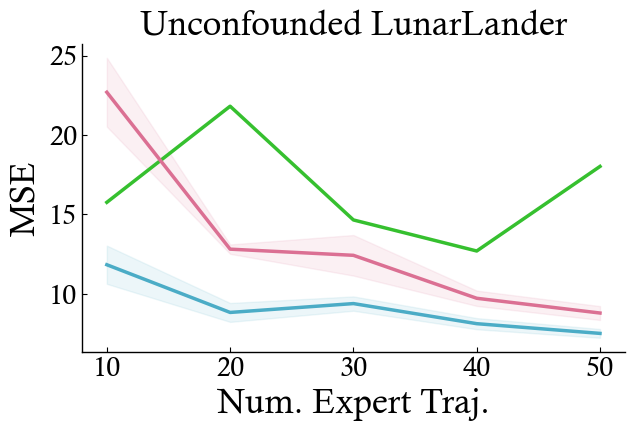

In [29]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("MSE", fontsize=25)
if env == "ant":
    plt.title("Unconfounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Unconfounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Unconfounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

# plt.plot(np.arange(10, 51, 10), bc_mse_denoised_DRL.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  bc_mse_denoised_DRL.mean(axis=0) - (bc_mse_denoised_DRL.std(axis=0) / np.sqrt(len(bc_mse_denoised_DRL))),
#                  bc_mse_denoised_DRL.mean(axis=0) + (bc_mse_denoised_DRL.std(axis=0) / np.sqrt(len(bc_mse_denoised_DRL))),
#                  color = "#DAA520",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), gail_mse_denoised.mean(axis=0), label="GAIL", color="#36C02F", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 gail_mse_denoised.mean(axis=0) - (gail_mse_denoised.std(axis=0) / np.sqrt(len(gail_mse_denoised))),
                 gail_mse_denoised.mean(axis=0) + (gail_mse_denoised.std(axis=0) / np.sqrt(len(gail_mse_denoised))),
                 color = "#36C02F",
                 alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil_mse_denoised_DRL.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil_mse_denoised_DRL.mean(axis=0) - (ccil_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_mse_denoised_DRL))),
#                  ccil_mse_denoised_DRL.mean(axis=0) + (ccil_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_mse_denoised_DRL))),
#                  color = "#DB7093",
#                  alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil2_mse_denoised_DRL.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil2_mse_denoised_DRL.mean(axis=0) - (ccil2_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_DRL))),
#                  ccil2_mse_denoised_DRL.mean(axis=0) + (ccil2_mse_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_DRL))),
#                  color = "#4BACC6",
#                  alpha = 0.1)

plt.plot(np.arange(10, 51, 10), ccil_mse_denoised_C2L.mean(axis=0), label="C2L", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_mse_denoised_C2L.mean(axis=0) - (ccil_mse_denoised_C2L.std(axis=0) / np.sqrt(len(ccil_mse_denoised_C2L))),
                 ccil_mse_denoised_C2L.mean(axis=0) + (ccil_mse_denoised_C2L.std(axis=0) / np.sqrt(len(ccil_mse_denoised_C2L))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_mse_denoised_C2L.mean(axis=0), label="C2L *", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_mse_denoised_C2L.mean(axis=0) - (ccil2_mse_denoised_C2L.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_C2L))),
                 ccil2_mse_denoised_C2L.mean(axis=0) + (ccil2_mse_denoised_C2L.std(axis=0) / np.sqrt(len(ccil2_mse_denoised_C2L))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="upper right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/noiseless_mse_{0}_TCN&C2L_gail.pdf".format(env), bbox_inches='tight')

#### *J* Plot of **BC, DoubIL, RedisuIL** with TCN Data and 3-TCN Data under *Confounded and Unconfounded*
J under Confounded

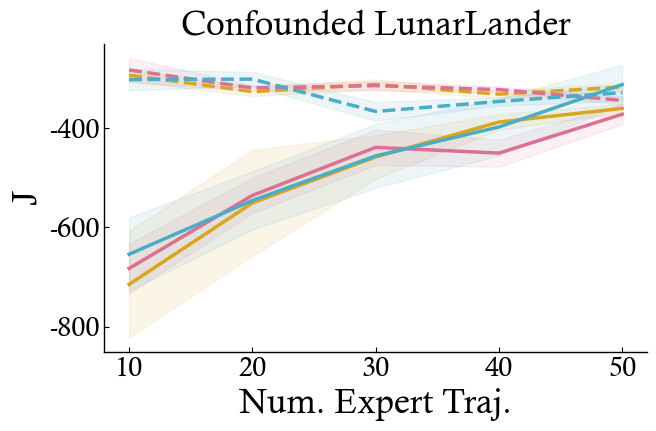

In [ ]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("J", fontsize=25)
if env == "ant":
    plt.title("Confounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Confounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Confounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

plt.plot(np.arange(10, 51, 10), bc_J_noisy_raw.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_noisy_raw.mean(axis=0) - (bc_J_noisy_raw.std(axis=0) / np.sqrt(len(bc_J_noisy_raw))),
                 bc_J_noisy_raw.mean(axis=0) + (bc_J_noisy_raw.std(axis=0) / np.sqrt(len(bc_J_noisy_raw))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_noisy_raw.mean(axis = 0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_noisy_raw.mean(axis=0) - (ccil_J_noisy_raw.std(axis=0) / np.sqrt(len(ccil_J_noisy_raw))),
                 ccil_J_noisy_raw.mean(axis=0) + (ccil_J_noisy_raw.std(axis=0) / np.sqrt(len(ccil_J_noisy_raw))),
                 color = "#DB7093",
                 alpha = 0.1)

plt.plot(np.arange(10, 51, 10), ccil2_J_noisy_raw.mean(axis = 0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_noisy_raw.mean(axis=0) - (ccil2_J_noisy_raw.std(axis=0) / np.sqrt(len(ccil2_J_noisy_raw))),
                 ccil2_J_noisy_raw.mean(axis=0) + (ccil2_J_noisy_raw.std(axis=0) / np.sqrt(len(ccil2_J_noisy_raw))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), bc_J_noisy_DRL.mean(axis=0), label="BC New", color="#DAA520", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_noisy_DRL.mean(axis=0) - (bc_J_noisy_DRL.std(axis=0) / np.sqrt(len(bc_J_noisy_DRL))),
                 bc_J_noisy_DRL.mean(axis=0) + (bc_J_noisy_DRL.std(axis=0) / np.sqrt(len(bc_J_noisy_DRL))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_noisy_DRL.mean(axis=0), label="Doubil New", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_noisy_DRL.mean(axis=0) - (ccil_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_J_noisy_DRL))),
                 ccil_J_noisy_DRL.mean(axis=0) + (ccil_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_J_noisy_DRL))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_J_noisy_DRL.mean(axis=0), label="Residuil New", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_noisy_DRL.mean(axis=0) - (ccil2_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_J_noisy_DRL))),
                 ccil2_J_noisy_DRL.mean(axis=0) + (ccil2_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_J_noisy_DRL))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="lower right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/cnfnd_J_{0}_Raw&TCN.pdf".format(env), bbox_inches='tight')

J under Unconfounded

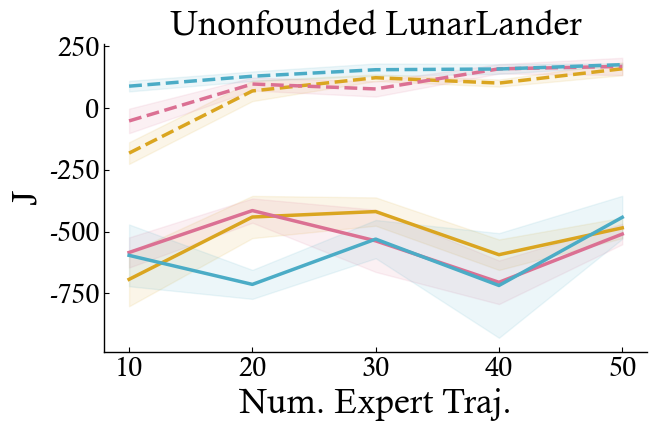

In [ ]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("J", fontsize=25)
if env == "ant":
    plt.title("Unconfounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Unconfounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Unonfounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

plt.plot(np.arange(10, 51, 10), bc_J_denoised_raw.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_denoised_raw.mean(axis=0) - (bc_J_denoised_raw.std(axis=0) / np.sqrt(len(bc_J_denoised_raw))),
                 bc_J_denoised_raw.mean(axis=0) + (bc_J_denoised_raw.std(axis=0) / np.sqrt(len(bc_J_denoised_raw))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_denoised_raw.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_denoised_raw.mean(axis=0) - (ccil_J_denoised_raw.std(axis=0) / np.sqrt(len(ccil_J_denoised_raw))),
                 ccil_J_denoised_raw.mean(axis=0) + (ccil_J_denoised_raw.std(axis=0) / np.sqrt(len(ccil_J_denoised_raw))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_J_denoised_raw.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_denoised_raw.mean(axis=0) - (ccil2_J_denoised_raw.std(axis=0) / np.sqrt(len(ccil2_J_denoised_raw))),
                 ccil2_J_denoised_raw.mean(axis=0) + (ccil2_J_denoised_raw.std(axis=0) / np.sqrt(len(ccil2_J_denoised_raw))),
                 color = "#4BACC6",
                 alpha = 0.1)

plt.plot(np.arange(10, 51, 10), bc_J_denoised_DRL.mean(axis=0), label="BC New", color="#DAA520",   linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_denoised_DRL.mean(axis=0) - (bc_J_denoised_DRL.std(axis=0) / np.sqrt(len(bc_J_denoised_DRL))),
                 bc_J_denoised_DRL.mean(axis=0) + (bc_J_denoised_DRL.std(axis=0) / np.sqrt(len(bc_J_denoised_DRL))),
                 color = "#DAA520",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_denoised_DRL.mean(axis=0), label="Doubil New", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_denoised_DRL.mean(axis=0) - (ccil_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_J_denoised_DRL))),
                 ccil_J_denoised_DRL.mean(axis=0) + (ccil_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_J_denoised_DRL))),
                 color = "#DB7093",
                 alpha = 0.1)

plt.plot(np.arange(10, 51, 10), ccil2_J_denoised_DRL.mean(axis=0), label="Residuil New", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_denoised_DRL.mean(axis=0) - (ccil2_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_J_denoised_DRL))),
                 ccil2_J_denoised_DRL.mean(axis=0) + (ccil2_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_J_denoised_DRL))),
                 color = "#4BACC6",
                 alpha = 0.1)             
if env == "ant":
    plt.legend(ncol=1, loc="lower right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/noiseless_J_{0}_Raw&TCN.pdf".format(env), bbox_inches='tight')

#### *J* Plot of between **BC, DoubIL, RedisuIL** and __C2L, C2L__ under *Confounded and Unconfounded*
J under Confounded

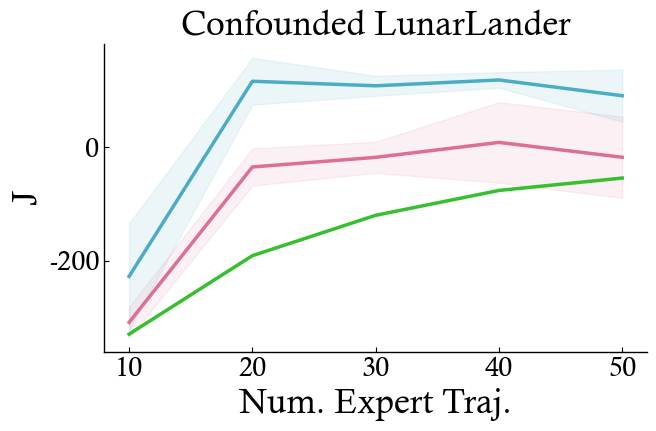

In [30]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("J", fontsize=25)
if env == "ant":
    plt.title("Confounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Confounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Confounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

# plt.plot(np.arange(10, 51, 10), bc_J_noisy_DRL.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  bc_J_noisy_DRL.mean(axis=0) - (bc_J_noisy_DRL.std(axis=0) / np.sqrt(len(bc_J_noisy_DRL))),
#                  bc_J_noisy_DRL.mean(axis=0) + (bc_J_noisy_DRL.std(axis=0) / np.sqrt(len(bc_J_noisy_DRL))),
#                  color = "#DAA520",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), gail_J_noisy.mean(axis=0), label="GAIL", color="#36C02F", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 gail_J_noisy.mean(axis=0) - (gail_J_noisy.std(axis=0) / np.sqrt(len(gail_J_noisy))),
                 gail_J_noisy.mean(axis=0) + (gail_J_noisy.std(axis=0) / np.sqrt(len(gail_J_noisy))),
                 color = "#36C02F",
                 alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil_J_noisy_DRL.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil_J_noisy_DRL.mean(axis=0) - (ccil_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_J_noisy_DRL))),
#                  ccil_J_noisy_DRL.mean(axis=0) + (ccil_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil_J_noisy_DRL))),
#                  color = "#DB7093",
#                  alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil2_J_noisy_DRL.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil2_J_noisy_DRL.mean(axis=0) - (ccil2_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_J_noisy_DRL))),
#                  ccil2_J_noisy_DRL.mean(axis=0) + (ccil2_J_noisy_DRL.std(axis=0) / np.sqrt(len(ccil2_J_noisy_DRL))),
#                  color = "#4BACC6",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_noisy_C2L.mean(axis=0), label="C2L", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_noisy_C2L.mean(axis=0) - (ccil_J_noisy_C2L.std(axis=0) / np.sqrt(len(ccil_J_noisy_C2L))),
                 ccil_J_noisy_C2L.mean(axis=0) + (ccil_J_noisy_C2L.std(axis=0) / np.sqrt(len(ccil_J_noisy_C2L))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_J_noisy_C2L.mean(axis=0), label="C2L*", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_noisy_C2L.mean(axis=0) - (ccil2_J_noisy_C2L.std(axis=0) / np.sqrt(len(ccil2_J_noisy_C2L))),
                 ccil2_J_noisy_C2L.mean(axis=0) + (ccil2_J_noisy_C2L.std(axis=0) / np.sqrt(len(ccil2_J_noisy_C2L))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="lower right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/cnfnd_J_{0}_TCN&C2L_gail.pdf".format(env), bbox_inches='tight')

J under Unconfounded

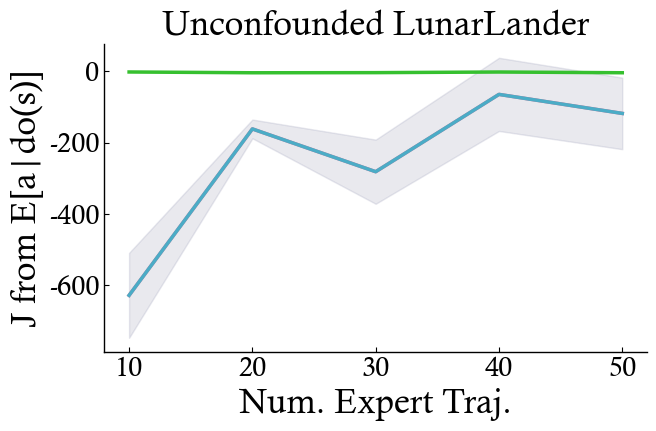

In [ ]:
setup_plot()
plt.xlabel("Num. Expert Traj.", fontsize=25)
plt.ylabel("J from E[a|do(s)]", fontsize=25)
if env == "ant":
    plt.title("Unconfounded AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Unconfounded HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Unconfounded LunarLander", fontsize=25)
plt.yticks(fontproperties='Calisto MT', size=20)
plt.xticks(fontproperties='Calisto MT', size=20)

# plt.plot(np.arange(10, 51, 10), bc_J_denoised_DRL.mean(axis=0), label="BC", color="#DAA520",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  bc_J_denoised_DRL.mean(axis=0) - (bc_J_denoised_DRL.std(axis=0) / np.sqrt(len(bc_J_denoised_DRL))),
#                  bc_J_denoised_DRL.mean(axis=0) + (bc_J_denoised_DRL.std(axis=0) / np.sqrt(len(bc_J_denoised_DRL))),
#                  color = "#DAA520",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), gail_J_denoised.mean(axis=0), label="GAIL", color="#36C02F", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 gail_J_denoised.mean(axis=0) - (gail_J_denoised.std(axis=0) / np.sqrt(len(gail_J_denoised))),
                 gail_J_denoised.mean(axis=0) + (gail_J_denoised.std(axis=0) / np.sqrt(len(gail_J_denoised))),
                 color = "#36C02F",
                 alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil_J_denoised_DRL.mean(axis=0), label="Doubil", color="#DB7093",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil_J_denoised_DRL.mean(axis=0) - (ccil_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_J_denoised_DRL))),
#                  ccil_J_denoised_DRL.mean(axis=0) + (ccil_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil_J_denoised_DRL))),
#                  color = "#DB7093",
#                  alpha = 0.1)
# plt.plot(np.arange(10, 51, 10), ccil2_J_denoised_DRL.mean(axis=0), label="Residuil", color="#4BACC6",linestyle = "--", linewidth=2.5)
# plt.fill_between(np.arange(10, 51, 10),
#                  ccil2_J_denoised_DRL.mean(axis=0) - (ccil2_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_J_denoised_DRL))),
#                  ccil2_J_denoised_DRL.mean(axis=0) + (ccil2_J_denoised_DRL.std(axis=0) / np.sqrt(len(ccil2_J_denoised_DRL))),
#                  color = "#4BACC6",
#                  alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil_J_denoised_C2L.mean(axis=0), label="C2L", color="#DB7093", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil_J_denoised_C2L.mean(axis=0) - (ccil_J_denoised_C2L.std(axis=0) / np.sqrt(len(ccil_J_denoised_C2L))),
                 ccil_J_denoised_C2L.mean(axis=0) + (ccil_J_denoised_C2L.std(axis=0) / np.sqrt(len(ccil_J_denoised_C2L))),
                 color = "#DB7093",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), ccil2_J_denoised_C2L.mean(axis=0), label="C2L *", color="#4BACC6", linestyle = "solid", linewidth=2.5)
plt.fill_between(np.arange(10, 51, 10),
                 ccil2_J_denoised_C2L.mean(axis=0) - (ccil2_J_denoised_C2L.std(axis=0) / np.sqrt(len(ccil2_J_denoised_C2L))),
                 ccil2_J_denoised_C2L.mean(axis=0) + (ccil2_J_denoised_C2L.std(axis=0) / np.sqrt(len(ccil2_J_denoised_C2L))),
                 color = "#4BACC6",
                 alpha = 0.1)
if env == "ant":
    plt.legend(ncol=1, loc="lower right", fontsize=16)
plt.savefig("Figure/MSE&J_Figure/noiseless_J_{0}_TCN&C2L_gail.pdf".format(env), bbox_inches='tight')

## __Load Accuracy Data__

In [28]:
import numpy as np
# env = 'ant'
accuracy_diff_distribution = np.load("./data/output_accuracy/{0}_Accuracy&Diff_Distributions.pkl".format(env), allow_pickle=True)
accuracy_diff_hop = np.load("./data/output_accuracy/{0}_Accuracy&Diff_Hops.pkl".format(env), allow_pickle=True)
accuracy_num_traj = np.load("./data/output_accuracy/{0}_Accuracy&Num_traj.pkl".format(env), allow_pickle=True)

In [97]:
accuracy_num_traj

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0]]

## __Accuracy__ Visualization

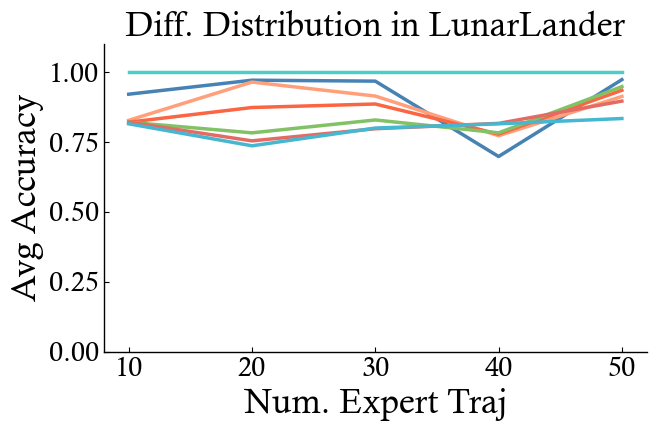

In [29]:
setup_plot()
plt.xlabel("Num. Expert Traj", fontsize=25)
plt.ylabel("Avg Accuracy", fontsize=25)
if env == "ant":
    plt.title("Diff. Distribution in AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Diff. Distribution in HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Diff. Distribution in LunarLander", fontsize=25)
plt.xticks(fontproperties = 'Calisto MT', fontsize=20)
plt.yticks(fontproperties = 'Calisto MT', fontsize=20)
plt.ylim((0,1.1))
color = ["#4ECDC4", "#4682B4", "#FFA07A", "#FB6542", "#83C167", "#E46B63", "#45B7D1"]

i = 0
for label, value in accuracy_diff_distribution.items():
    plt.plot(np.arange(10, 51, 10), value, label=label, color = color[i],linewidth=2.5)
    i += 1
if env == "hc":
    plt.legend(ncol=2, loc="lower right", fontsize=18)
plt.savefig("Figure/Accuracy_Figure/{0}_Accuracy&Diff_Distributions.pdf".format(env), bbox_inches='tight')


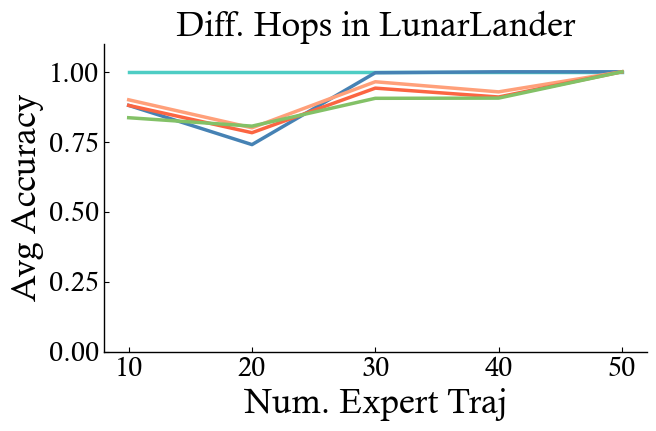

In [30]:
setup_plot()
plt.xlabel("Num. Expert Traj", fontsize=25)
plt.ylabel("Avg Accuracy", fontsize=25)
if env == "ant":
    plt.title("Diff. Hops in AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Diff. Hops in HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Diff. Hops in LunarLander", fontsize=25)
plt.xticks(fontproperties = 'Calisto MT', fontsize=20)
plt.yticks(fontproperties = 'Calisto MT', fontsize=20)
plt.ylim((0,1.1))
i = 0
for label, value in accuracy_diff_hop.items():
    plt.plot(np.arange(10, 51, 10), value, label=label , color=color[i], linewidth=2.5)
    i += 1
if env == "hc":
    plt.legend(ncol=2, loc="lower right", fontsize=18)
# plt.legend(ncol=1, loc="lower right", fontsize=16)
plt.savefig("Figure/Accuracy_Figure/{0}_Accuracy&Diff_Hops.pdf".format(env), bbox_inches='tight')


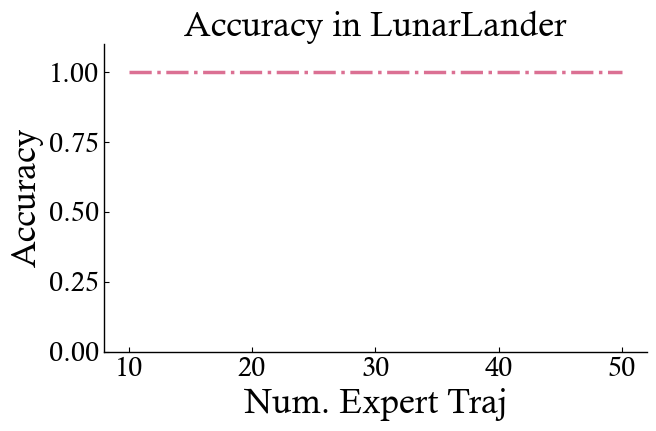

In [31]:
setup_plot()
plt.xlabel("Num. Expert Traj", fontsize=25)
plt.ylabel("Accuracy", fontsize=25)
if env == "ant":
    plt.title("Accuracy in AntBulletEnv", fontsize=25)
elif env == "hc":
    plt.title("Accuracy in HalfCheetah", fontsize=25)
elif env == "ll":
    plt.title("Accuracy in LunarLander", fontsize=25)
plt.xticks(fontproperties = 'Calisto MT', fontsize=20)
plt.yticks(fontproperties = 'Calisto MT', fontsize=20)
plt.ylim((0,1.1))
plt.plot(np.arange(10, 51, 10), np.array(accuracy_num_traj).mean(axis=0), label="3-TCN", color="#DB7093", linestyle = "-.", linewidth=2.5)
if env == "hc":
    plt.legend(ncol=1, loc="lower right", fontsize=18)
plt.savefig("Figure/Accuracy_Figure/{0}_Accuracy&Num_traj.pdf".format(env), bbox_inches='tight')
